In [40]:
import pandas as pd  #https://discoverdatasciencelab.com/2018/10/23/introduccion-a-pandas/ 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np  #https://discoverdatasciencelab.com/2018/10/09/introduccion-a-numpy-y-su-importancia-para-la-gestion-de-diferentes-tipos-de-datos/
import seaborn as sns # módulo para visualización. https://seaborn.pydata.org/
import statistics # módulo de estadística. Permite obtener por ejemplo: media, deviación estándar, varianza, etc. https://docs.python.org/3/library/statistics.html
from collections import Counter # el módulo Counter nos permite contar el número de ocurrencias de un ítem en un conjunto de elementos. https://docs.python.org/2/library/collections.html
from collections import OrderedDict # este módulo sirve para recordar el orden en el cual los datos contenidos son añadidos. Para ver más ejemplos: https://pymotw.com/3/collections/ordereddict.html

In [41]:
#importamos el archivo BlackFriday.csv
# El dataset viene de una competición organizada por Analytics Vidhya.
data=pd.read_csv('BlackFriday.csv')
#Presentamos los 4 primeros registros del dataset
data.head(4)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057


In [42]:
#Presentamos el nombre de las columnas del dataset
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

# Descripción de las columnas

- User_ID ID del Usuario
- Product_ID ID del Producto
- Gender Sexo del Usuario 
- Age Edad en Rangos
- Occupation Ocupación
- City_Category Categoría de la ciudad (A,B,C). No se especifica detalle de la definición de la categoría
- Stay_In_Current_City_Years Numero de años de permanencia en la ciudad actual
- Marital_Status Estado Civil
- Product_Category_1 Categoría del producto
- Product_Category_2 El producto podría pertenecer a otra categoría
- Product_Category_3 El producto podría pertenecer a otra categoría
- Purchase Valor de las compras en dólares


In [43]:
#Detalles del dataset. 
#El método info() nos permite determinar si existen columnas con valores nulos los cuales deben ser procesados
#En el resultado veremos que las columnas Product_Category_2 y Product_Category_3 tienen un valor menor a 537577 valores no nulos,
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB
None


In [44]:
#Vemos a detalle el número y porcentaje de valores nulos
totalDatosNulos = data.isnull().sum()
porcentajeNulos = totalDatosNulos/data.isnull().count()*100
#Creamos un dataframe para presentar el número de datos faltantes y el porcentaje
datosFaltantes = pd.DataFrame({'Total datos faltantes':totalDatosNulos,
                            '% datos faltantes':porcentajeNulos})
#Ordenamos el dataFrame
datosFaltantes.sort_values(by='Total datos faltantes',
                         ascending=False).head(3)

,Total datos faltantes,% datos faltantes
Product_Category_3,373299,69.441029
Product_Category_2,166986,31.062713
User_ID,0,0.000000


In [45]:
#Para este ejemplo vamos reemplazar los valores nulos (en este caso reemplazamos con cero. )
# Se debe tener en cuenta que el tratamiento de los valores nulos depende de los datos y el contexto de los mismos
# por lo cual no siempre se va a reemplazar por cero.
data = data.fillna(0)

In [46]:
#verificamos que ya no existen datos faltantes
valoresFaltantes = data.isnull().sum().sort_values(ascending = False)
datosFaltantes = valoresFaltantes[valoresFaltantes > 0]/data.shape[0]
print(f'{datosFaltantes *100} %')

Series([], dtype: float64) %


In [47]:
#En el dataset tenemos que los nombres de las columnas es una mezcla de mayúsculas y minúsculas
#En este caso vamos a definir que los nombres de columnas queden en minúsculas.
data.columns = [each.lower() for each in data.columns]
data.columns

Index(['user_id', 'product_id', 'gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years', 'marital_status', 'product_category_1',
       'product_category_2', 'product_category_3', 'purchase'],
      dtype='object')

In [48]:
#El método describe() nos permite tener una idea global de los valores numéricos en el dataset. Presentando datos como: total de elementos, la media, mínimo, máximo, etc
data.describe()

,user_id,occupation,marital_status,product_category_1,product_category_2,product_category_3,purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,6.784907,3.871773,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,6.211618,6.265963,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,0.000000,0.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,0.000000,0.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,5.000000,0.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,14.000000,8.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [55]:
#Usando el módulo de estadísticas vamos a obtener algunos de los hallazgos en el dataset
#El método mode es utilizado para el caso de valores binarios y categorías.
print("Media del valor de Compras: ", statistics.mean(data['purchase']))
print('Rango de Edad con más número de compras: ',statistics.mode(data['age'])) #Indica que el rango de edad con más compras es el de 26-35
print('Género con más número de compras: ',statistics.mode(data['gender'])) #Indica que hombres compran más productos que las mujeres.
print('Estado civil con más compras: ',statistics.mode(data['marital_status'])) # Personas casadas compran más que los que no lo están


Media del valor de Compras:  9333.859852635065
Rango de Edad con más número de compras:  26-35
Género con más número de compras:  M
Estado civil con más compras:  0


In [50]:
# Ahora vamos a usar el método corr() para determinar la correlación entre las columnas. Valores ceranos o iguales a "uno" determinan una alta correlación
data.corr()

,user_id,occupation,marital_status,product_category_1,product_category_2,product_category_3,purchase
user_id,1.000000,-0.023024,0.018732,0.003687,0.003663,0.003938,0.005389
occupation,-0.023024,1.000000,0.024691,-0.008114,0.006792,0.011941,0.021104
marital_status,0.018732,0.024691,1.000000,0.020546,0.001146,-0.004363,0.000129
product_category_1,0.003687,-0.008114,0.020546,1.000000,-0.040730,-0.389048,-0.314125
product_category_2,0.003663,0.006792,0.001146,-0.040730,1.000000,0.090284,0.038395
product_category_3,0.003938,0.011941,-0.004363,-0.389048,0.090284,1.000000,0.284120
purchase,0.005389,0.021104,0.000129,-0.314125,0.038395,0.284120,1.000000


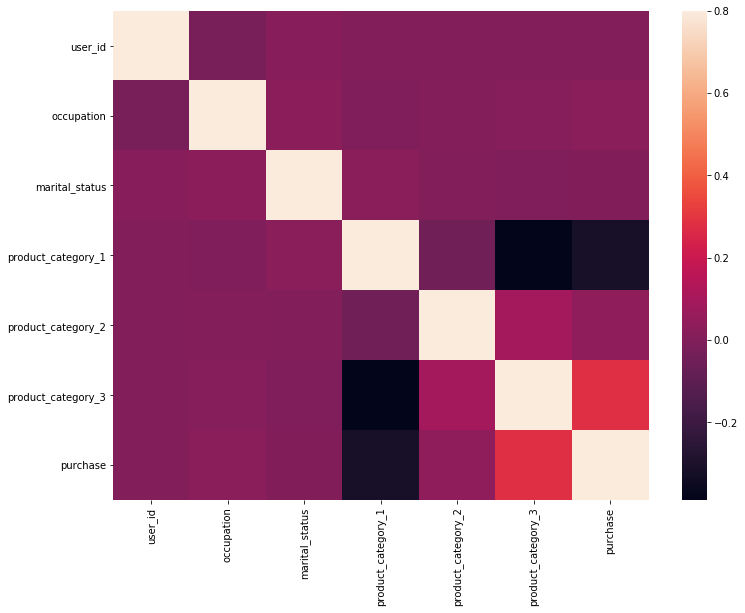

In [58]:
#En el resultado anterior podemos ver que no existe una alta correlación entre los atributos
#Podemos también visualizar el mismo resultado usando el módulo seaborn
correlacion = data.corr()
fig,ax = plt.subplots(figsize = (12,9))
sns.heatmap(correlacion, vmax=.8)
#Parámetros 
#  data: En este caso es la correlación obtenida por el método corr()
#  vmin, vmax : floats, optional
#     Permite definir el mapa de colores que vemos en la parte derecha del gráfico
# Mientras más blanco es el cuadrado indica una más alta correlación

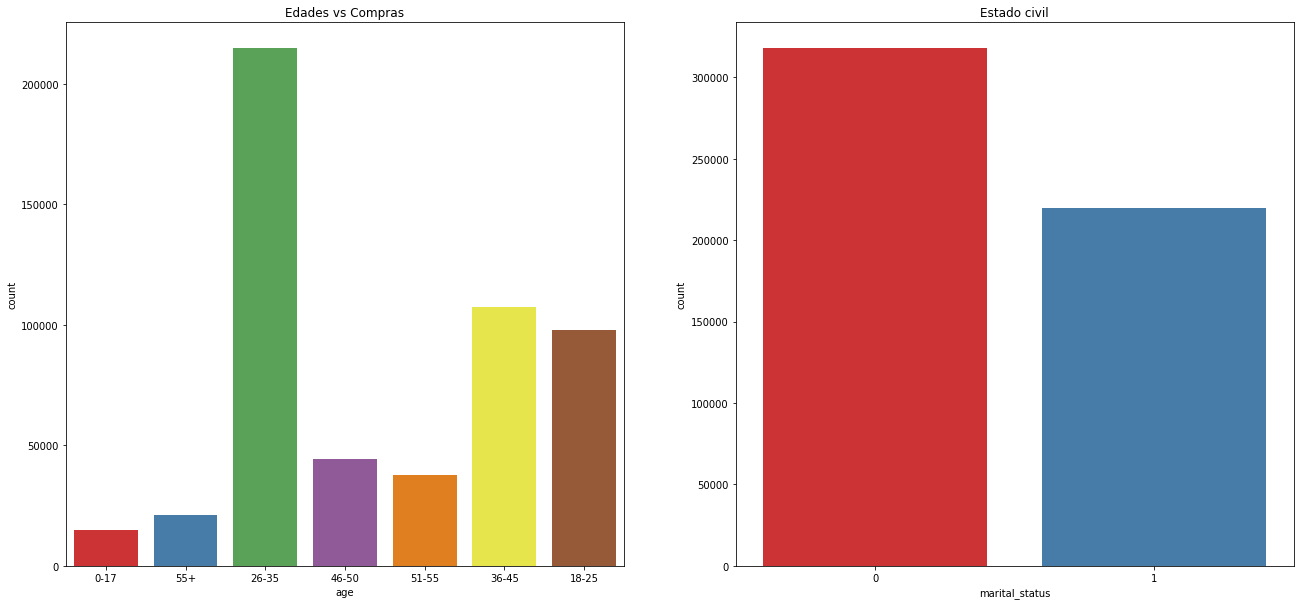

In [59]:
# Ahora vamos a crear dos gráficos usando el método supblots que nos permite generar más de un gráfico
# El primer gráfico nos muestra la distribución de las compras por rango de edad
# El segundo presenta el rango de compras por estado civil (casados y no casados)
fig,ax=plt.subplots(1,2,figsize=(22,10))
sns.countplot(data['age'],ax=ax[0],palette='Set1').set_title('Edades vs Compras')
sns.countplot(data['marital_status'],ax=ax[1],palette='Set1').set_title('Estado civil')
plt.show()

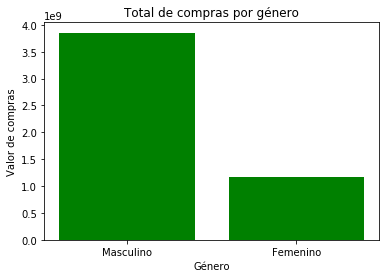

In [60]:
#En el gráfico final vemos la distribución de las compras por género (Masculino y Femenino)
genero = ['Masculino', 'Femenino']
comprasHombres = data[ data['gender']=='M']['purchase'].sum()
comprasMujeres = data[ data['gender']=='F']['purchase'].sum()
compras = [comprasHombres, comprasMujeres]
plt.bar(genero, compras, color='green')
plt.xlabel("Género")
plt.ylabel("Valor de compras")
plt.title("Total de compras por género")
plt.show()